In [63]:
import numpy
import os
import pandas as pd

## Set the project repo 
def ProjectRepo(path):
    ProjectRepo = os.popen('bdvcli --get cluster.project_repo').read().rstrip()
    print(ProjectRepo)
    return ProjectRepo + '/' + path        
# fix random seed for reproducibility

##Load the dataset
dataset = pd.read_csv(ProjectRepo('data/pima-indians-diabetes.csv'), delimiter=",")

dataset.columns = [
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]

/bd-fs-mnt/DBRepo


In [64]:
import numpy

In [65]:
corr = dataset.corr()
corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
PlGlcConc,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
BloodP,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
SkinThick,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
TwoHourSerIns,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
BMI,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
DiPedFunc,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
HasDiabetes,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


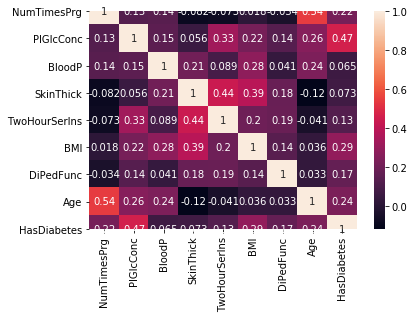

In [66]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

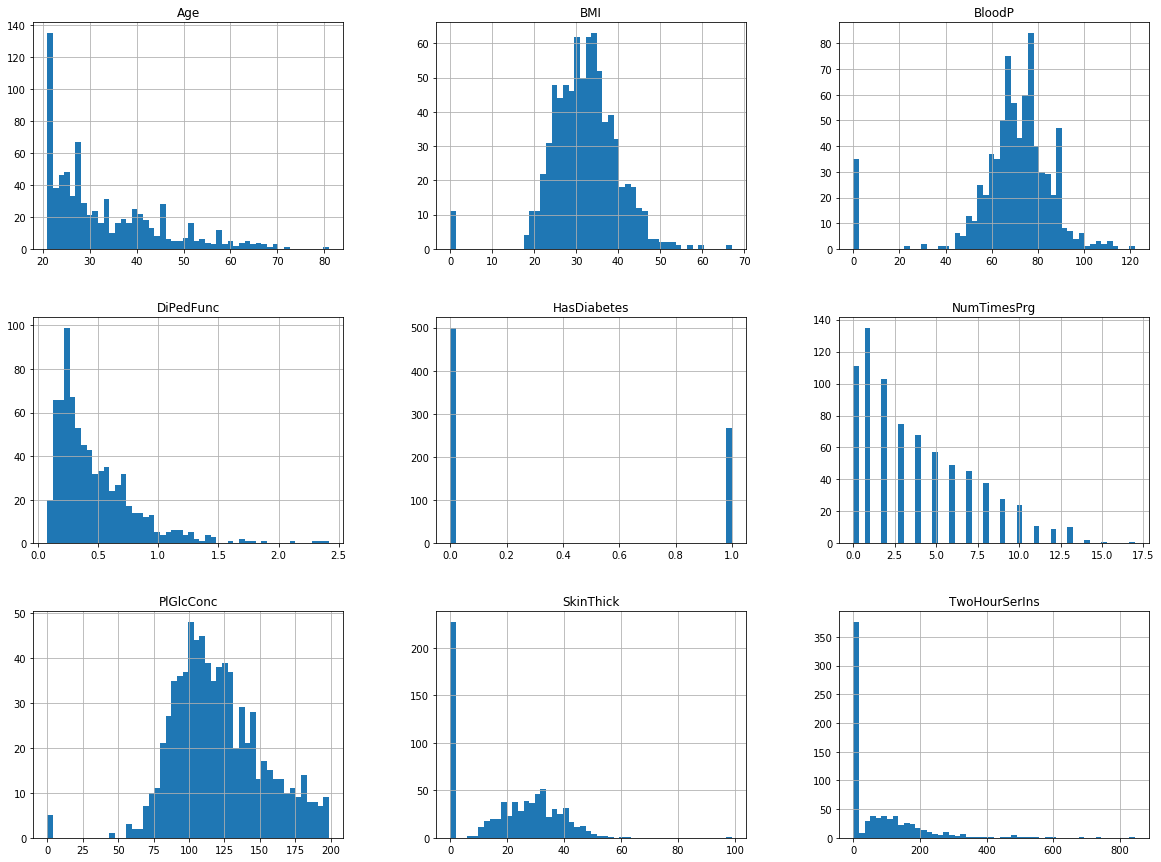

In [67]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [68]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
# load data
dataset = loadtxt(ProjectRepo('data/pima-indians-diabetes.csv'), delimiter=",") 

# split data into X and y
X_train = dataset[:,0:8]
y_train = dataset[:,8]

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

#
print(model.get_xgb_params())

/bd-fs-mnt/DBRepo
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1}


In [69]:
%attachments

Training Cluster    ML Engine
------------------  -----------
sparktraining       spark
tensorflow          python
gputensorflow       python


In [70]:
%%gputensorflow

import numpy
import os
import pandas as pd
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

## Set the project repo 
def ProjectRepo(path):
    ProjectRepo = os.popen('bdvcli --get cluster.project_repo').read().rstrip()
    print(ProjectRepo)
    return ProjectRepo + '/' + path        
# fix random seed for reproducibility

##Load the dataset
# Show the dataset
dataset = loadtxt(ProjectRepo('data/pima-indians-diabetes.csv'), delimiter=",") 
dataset.shape
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose= 0)

# evaluate the keras model
_, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(3):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

#save model weights and architecture together
model.save(ProjectRepo('models/db_remote.h5'))

# evaluate the keras model
_, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

# make class predictions with the model
predictions = model.predict_classes(X)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))
    
# load model
from keras.models import load_model

model = load_model(ProjectRepo('models/diabetes_GPU.h5'))
# summarize model.
model.summary()

History URL: http://bluedata-95.bdlocal:10001/history/6


In [76]:
%logs --url http://bluedata-94.bdlocal:10001/history/6

Job Status: Running
/bd-fs-mnt/DBRepo

